# Visual Hungarian Algorithm Example

James Yu

Vancouver School of Economics, UBC

13 April 2021

In [1]:
from hungarianviz.alg import hungarian
import numpy as np

First, load the matrix.

In [2]:
matrix = np.array([[28, 20, 8, 4], [21, 15, 6, 3], [14, 10, 4, 2], [7, 5, 2, 1]])
matrix

array([[28, 20,  8,  4],
       [21, 15,  6,  3],
       [14, 10,  4,  2],
       [ 7,  5,  2,  1]])

Next, run the algorithm.

In [3]:
result = hungarian(matrix)
print(result)
print()
print("Matches:", result.match)
print("Revenues:", result.revenues)
print("Row Potentials:", result.row_weights)
print("Col Potentials:", result.col_weights)
print("Total Revenue:", result.revenue_sum)

Matching:
['28', '  ', '  ', '  ']
['  ', '15', '  ', '  ']
['  ', '  ', ' 4', '  ']
['  ', '  ', '  ', ' 1']

Row Potentials: [15, 8, 3, 1]
Column Potentials: [13, 7, 1, 0]

Matches: [[0, 0], [1, 1], [2, 2], [3, 3]]
Revenues: [28, 15, 4, 1]
Row Potentials: [15, 8, 3, 1]
Col Potentials: [13, 7, 1, 0]
Total Revenue: 48


We can now display images as follows:

In [4]:
print(len(result.frames))

39


The following rendering code was adapted from [https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook](https://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook) and [https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots](https://stackoverflow.com/questions/2176424/hiding-axis-text-in-matplotlib-plots).

In [5]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image

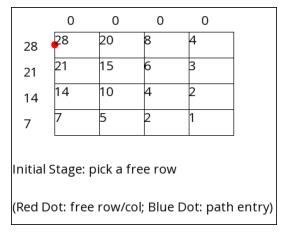

In [6]:
%matplotlib inline
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
imshow(np.asarray(result.frames[0]))

To obtain the n-th frame, we can do:

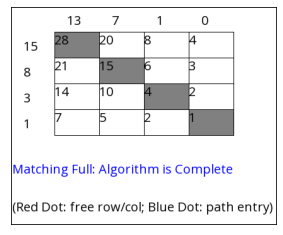

In [7]:
%matplotlib inline
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
n = 38
imshow(np.asarray(result.frames[n]))

To view all images at once as a GIF, run the following (code was adapted from [https://stackoverflow.com/a/32108899](https://stackoverflow.com/a/32108899)).


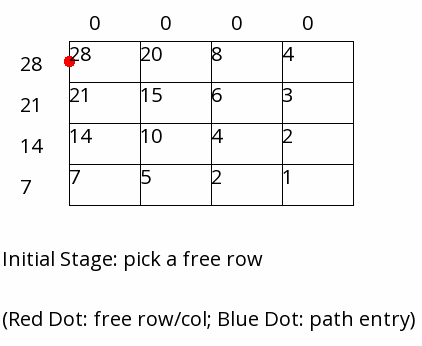

In [8]:
from io import BytesIO
filex = BytesIO()
result.frames[0].save(fp=filex, format='GIF', append_images=result.frames[1:], save_all=True, duration=2000, loop=0)

from IPython.display import HTML
from base64 import b64encode
HTML("<img src='data:image/gif;base64,{0}'/>".format(b64encode(filex.getvalue()).decode('utf-8')))

To save each individual frame to disk (e.g. to view as PNG images), run:

In [9]:
# import os
# os.mkdir("frames")
# for f in range(len(result.frames)):
#  result.frames[f].save(f"frames/frame{str(f).zfill(len(str(len(result.frames))))}.png")